In [ ]:
# import libraries
import pandas as pd
import io

# mount google drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sounding_Spirit/HoldingArchive.csv')
df["ssdl:holdingArchive"]=df["ssdl:holdingArchive"].astype(str)
df.head()

,ssdl:pid,ssdl:holdingArchive
0,1850-Missou-EMU,Pitts Theology Library
1,1850-Missou-EMU,Pitts Theology Library
2,1852-Collec-EMU,Pitts Theology Library
3,1852-Peters-EMU,Pitts Theology Library
4,1852-Reviva-EMU,Pitts Theology Library


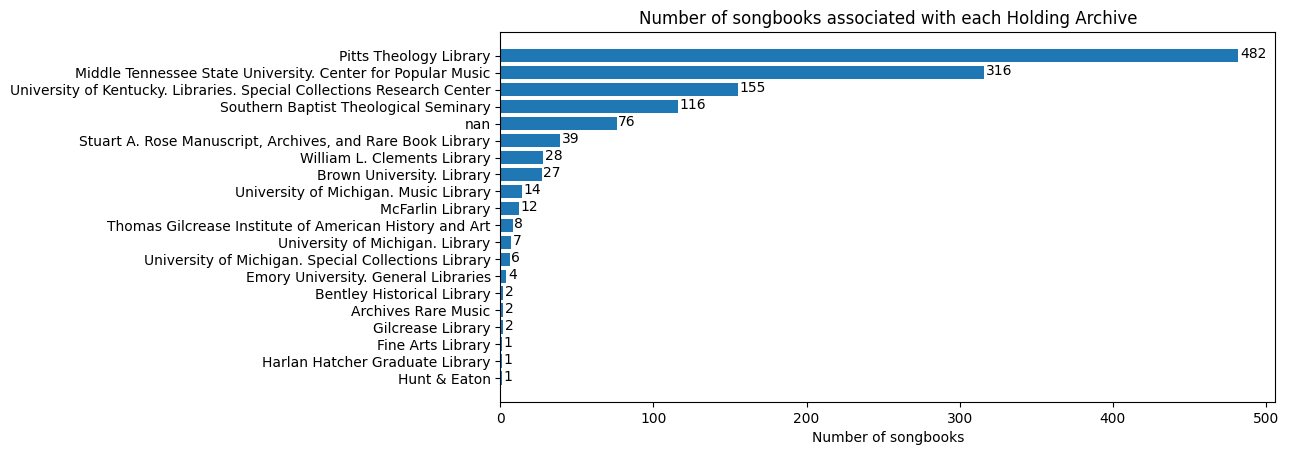

In [ ]:
# plot the number of songbooks associated with each Holding Archive
import numpy as np
import matplotlib.pyplot as plt

data = {}
for x in df.index:
  for archive in df.loc[x,"ssdl:holdingArchive"].split(";"):
    if archive not in data:
      data[archive]=0
    data[archive] = data[archive]+1

# data.pop("Nil")
# data.pop("nan")

# print(data)
data = dict(sorted(data.items(), key=lambda item: item[1]))

notations = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()
fig.set_figwidth(10)

# Example data
y_pos = np.arange(len(notations))

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos, labels=notations)
ax.set_xlabel('Number of songbooks')
ax.set_title('Number of songbooks associated with each Holding Archive')

for i in ax.patches:
    plt.text(i.get_width()+1, i.get_y()+0.25,
             str(round((i.get_width()), 2)),
             fontsize = 10,
             color ='black')

plt.show()